In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import seaborn as sns
from sklearn.metrics import roc_curve, auc
import warnings
warnings.filterwarnings('ignore')

1.	Data Preparation

In [33]:
file_path = "file.csv"
df = pd.read_csv(file_path)

In [34]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   stimulus_feature_1  500 non-null    float64
 1   stimulus_feature_2  500 non-null    float64
 2   stimulus_feature_3  500 non-null    float64
 3   stimulus_feature_4  500 non-null    float64
 4   stimulus_feature_5  500 non-null    float64
 5   neural_response     500 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 23.6 KB
None


In [35]:
print(df.head())

   stimulus_feature_1  stimulus_feature_2  stimulus_feature_3  \
0            0.374540            0.950714            0.731994   
1            0.155995            0.058084            0.866176   
2            0.020584            0.969910            0.832443   
3            0.183405            0.304242            0.524756   
4            0.611853            0.139494            0.292145   

   stimulus_feature_4  stimulus_feature_5  neural_response  
0            0.598658            0.156019                1  
1            0.601115            0.708073                0  
2            0.212339            0.181825                0  
3            0.431945            0.291229                0  
4            0.366362            0.456070                0  


2.	Data Analysis

In [36]:
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 stimulus_feature_1    0
stimulus_feature_2    0
stimulus_feature_3    0
stimulus_feature_4    0
stimulus_feature_5    0
neural_response       0
dtype: int64


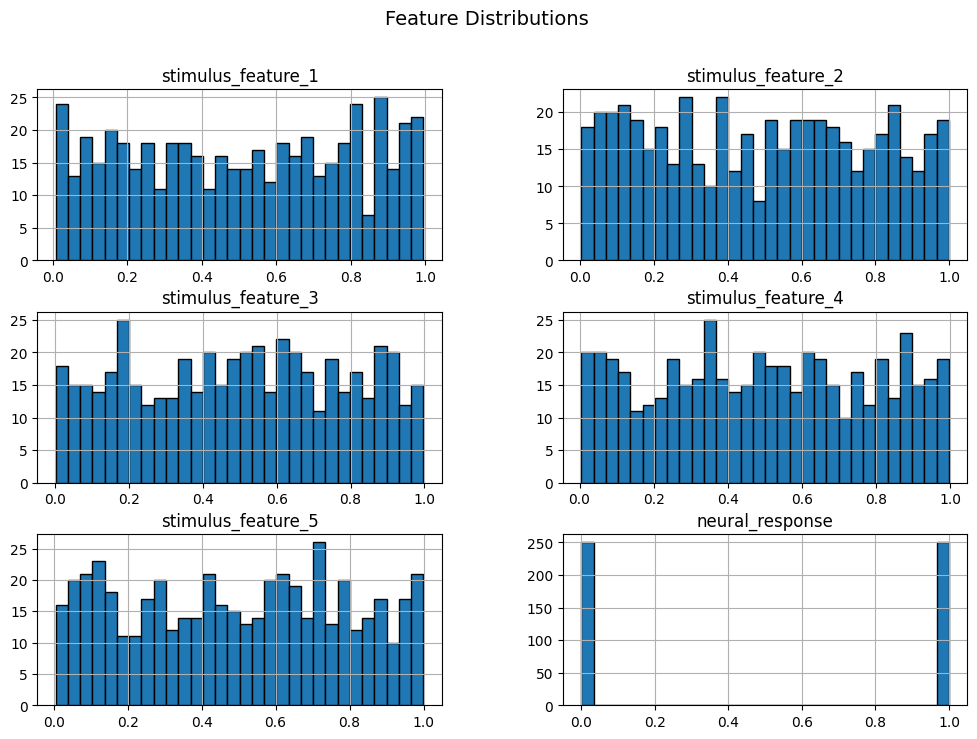

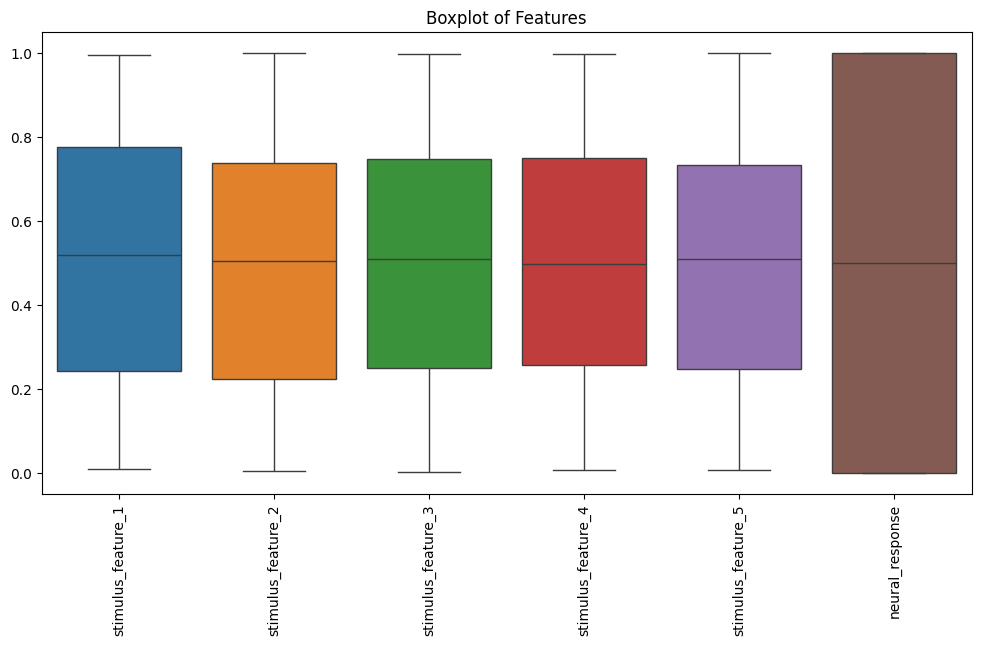

In [37]:
df.hist(figsize=(12, 8), bins=30, edgecolor="black")
plt.suptitle("Feature Distributions", fontsize=14)
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title("Boxplot of Features")
plt.show()

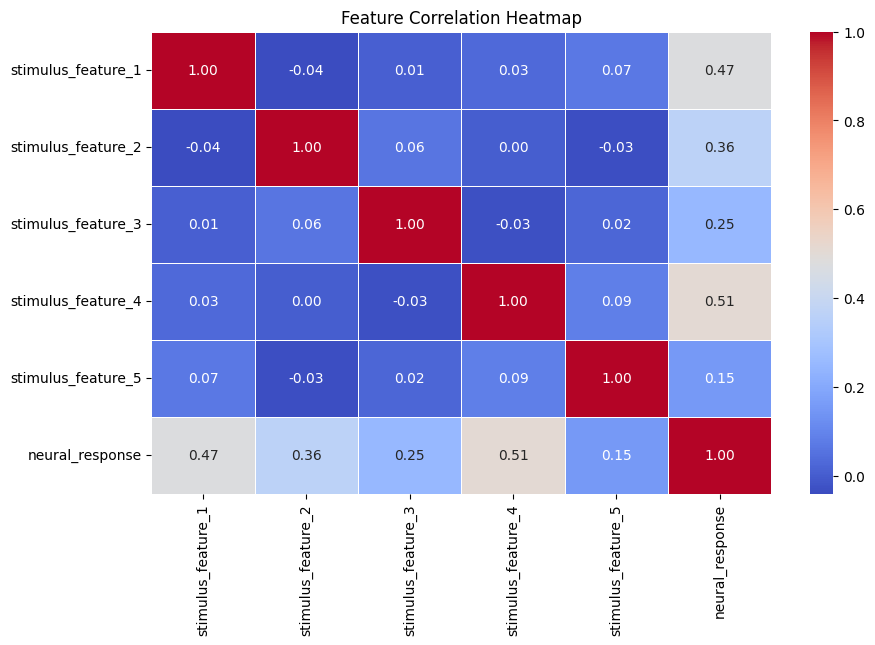

In [38]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

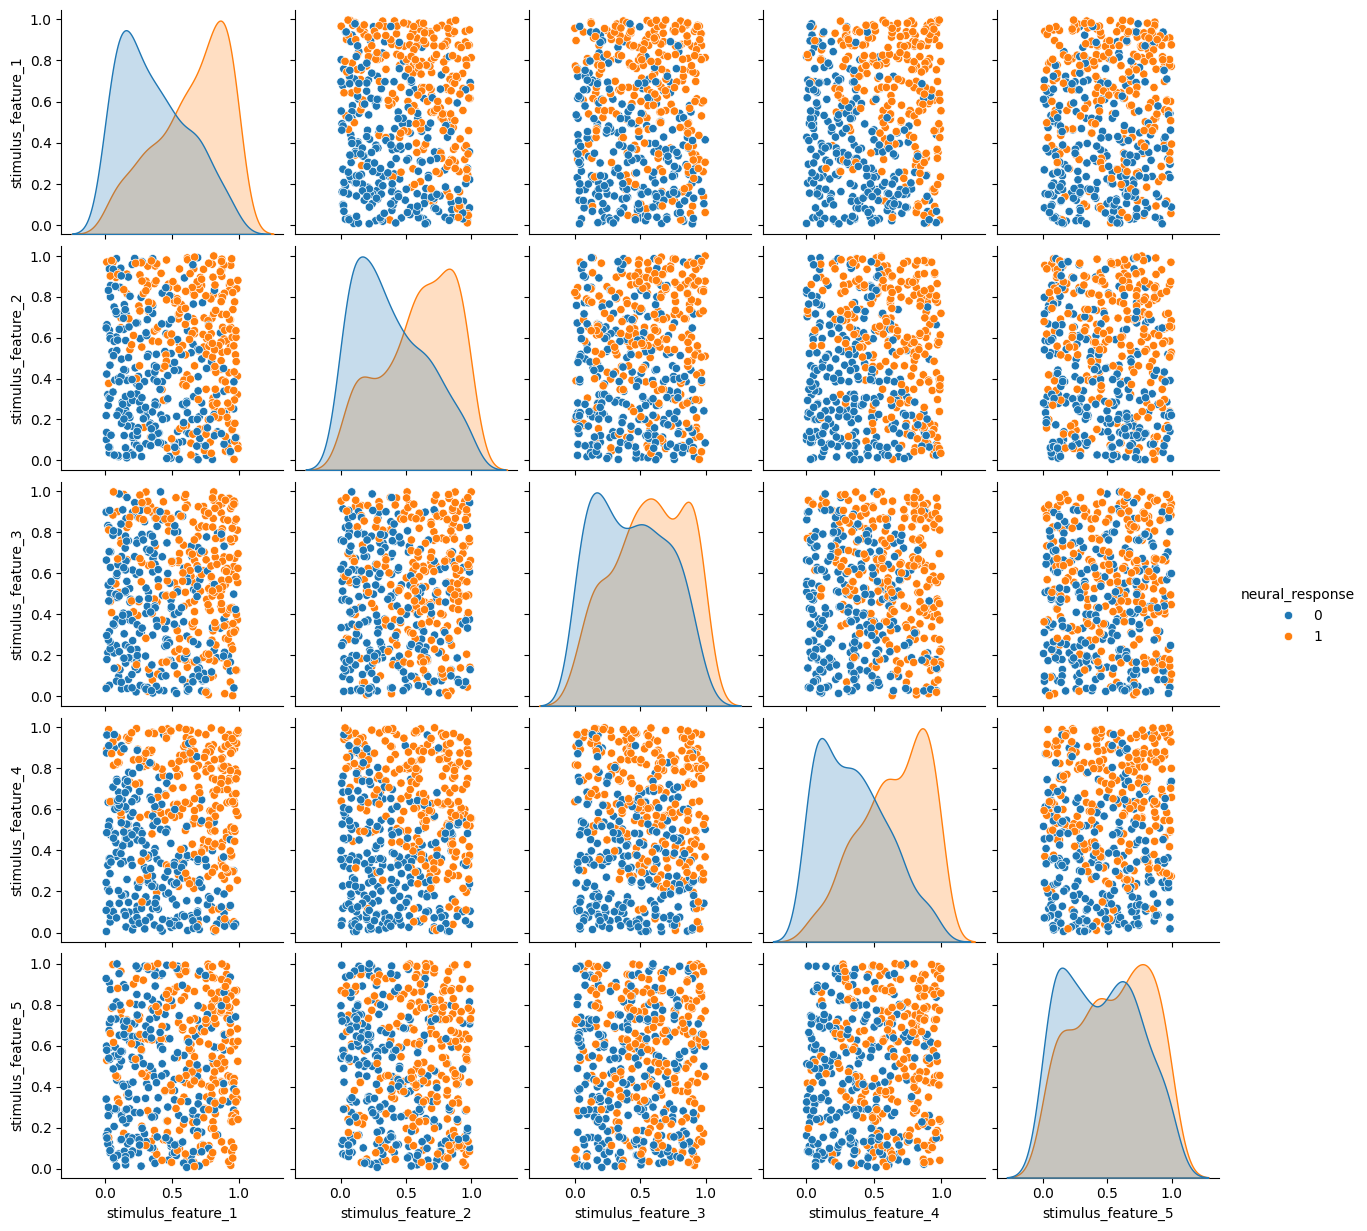

In [39]:
sample_df = df.sample(n=500, random_state=42) if len(df) > 500 else df
sns.pairplot(sample_df, hue=target_column, diag_kind="kde")
plt.show()

In [40]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")

Training set size: (350, 5)
Test set size: (150, 5)


3.	Model Implementation

In [41]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

4.	Make Predictions on the Test Data

In [42]:
y_pred = model.predict(X_test)
print("Sample Predictions:")
print(y_pred[:10])

Sample Predictions:
[1 1 0 0 1 0 0 0 1 1]


5.	Evaluate the Model Performance

In [43]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

Model Accuracy: 0.9933


In [44]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99        75
           1       0.99      1.00      0.99        75

    accuracy                           0.99       150
   macro avg       0.99      0.99      0.99       150
weighted avg       0.99      0.99      0.99       150



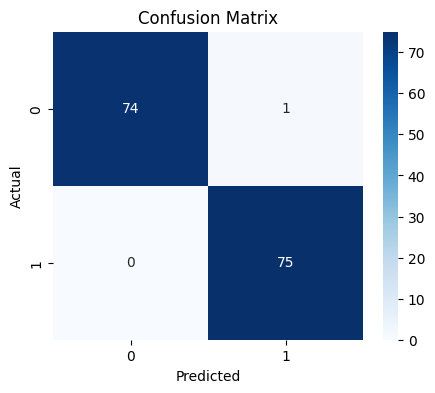

In [45]:
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

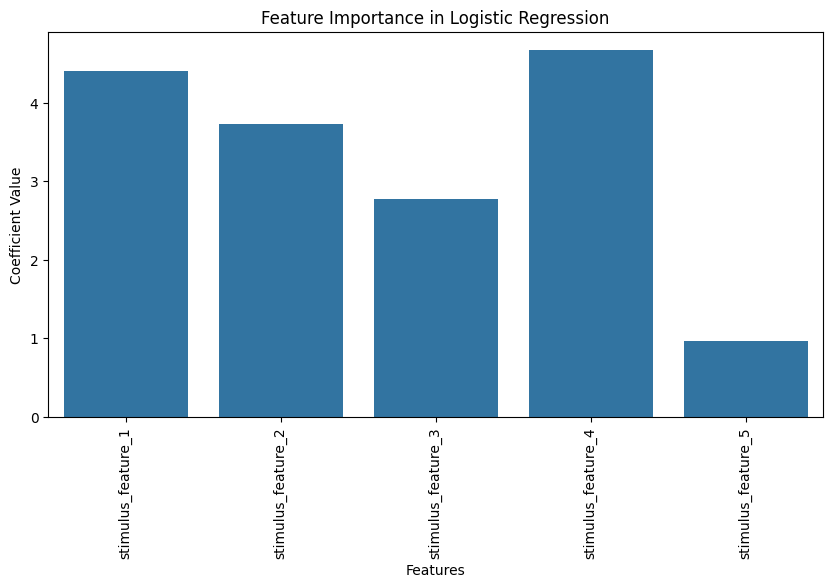

In [46]:
plt.figure(figsize=(10, 5))
sns.barplot(x=X.columns, y=model.coef_[0])
plt.xticks(rotation=90)
plt.title("Feature Importance in Logistic Regression")
plt.xlabel("Features")
plt.ylabel("Coefficient Value")
plt.show()

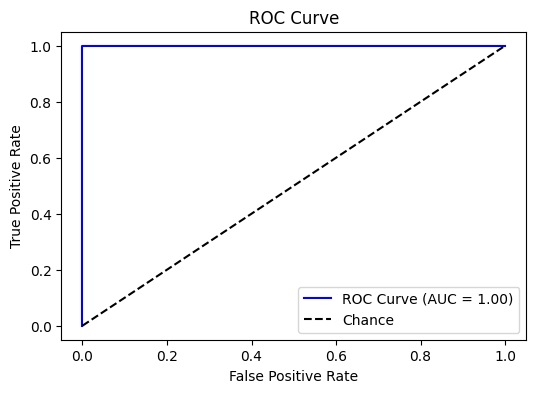

In [47]:
if len(set(y_test)) == 2:
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], 'k--', label="Chance")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()
    plt.show()

#Conclusion

In this computational neuroscience experiment, we analyzed neural responses to stimuli using data processing, visualization, and machine learning techniques. The study involved loading and inspecting a dataset, splitting it into training and test sets, implementing a logistic regression model, and evaluating its performance using various metrics and visualizations.

First, we conducted exploratory data analysis, including class distribution, feature correlation, and outlier detection through histograms, boxplots, and heatmaps. This helped in understanding the structure of the dataset and identifying key patterns. The data was then split into training (70%) and test (30%) sets to ensure a fair evaluation of the model.

Next, we implemented a logistic regression classifier to predict neural responses based on stimulus features. The trained model’s coefficients were visualized to determine the importance of each feature in classification. Predictions were made on the test set, and performance was evaluated using accuracy scores, confusion matrices, and classification reports. Additionally, an ROC curve was plotted to assess the classifier’s ability to distinguish between different neural response states.

The results showed how well the logistic regression model performed in classifying neural responses. The confusion matrix highlighted classification errors, while the feature importance plot provided insights into which stimulus features influenced neural activity the most. The ROC curve, where applicable, measured the trade-off between true positive and false positive rates, further validating the model’s reliability.

In conclusion, this experiment successfully demonstrated the application of machine learning in neural data analysis. Through statistical modeling and visualization techniques, we were able to extract meaningful insights from neural response data, helping to bridge the gap between computational methods and neuroscience research. Future improvements could involve testing more advanced models such as support vector machines or deep learning techniques to enhance predictive accuracy.